# M-sequence code and demonstration

An M-sequence (maximum length sequence, or MLS) is a pseudo-random binary sequence. It is defined by the number N of memory elements it contains, and generates every possible N-length subsequence (except 00...00) before repeating. Because it has a delta-function autocorrelation function (besides a DC offset), it makes for a good input function to estimate linear filters. Further, because it is technically deterministic with non-repeating N-length subsequences (until you exhaust all of them and restart), instantations of the M-sequence often end up "more even" than instantiations of, say, a truly random white-noise binary sequence.

An M-sequence is created using two variables. The first, x(t) is an auxiliary binary vector consisting of an N-length list of 1s and 0s. The second, s(t), is the resulting M-sequence itself, and at time t is equal to the last element of x(t). E.g. for N = 6, if x(t) = 100101 then s(t) = 1, and if x(t) = 110010 then s(t) = 0. The sequence is generated by updating x(t) at each time step and then extracting s(t) for the final sequence. The update rule for x(t) is simple to implement and is described in more detail in (http://www.kempacoustics.com/thesis/node83.html#mlsrecurrsion).

The key parameters we must choose are the minimum pulse length, as well as the number of memory elements N in the sequence.

Here we give the (hopefully interpretable) Python code for creating an M-sequence s(t), and we plot what a segment of it will look like.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from plot import set_font_size

In [2]:
N = 16  # memory elements, which specify period of sequence (P = 2^N - 1)
L = 3000  # number of time increments to include

# recursion relation corresponding to N = 16
# (http://www.kempacoustics.com/thesis/node83.html#mlsrecurrsion)
REC = [5, 3, 2, 0]

# generate initial random x vector
while True:
    # keep making x's until we get one that is not all zeros
    # (which should happen very fast)
    x = np.random.binomial(1, .5, N)
    
    if not all(x > 0):
        break

# generate final sequence
s = []

# loop over all time increments
for t in range(L):
    
    # compute new x
    x_new = np.zeros(x.shape)
    
    # set x_new[1:end] = x[0:end-1]
    x_new[1:] = x[:-1]
    # set x_new[0] from recursion relation
    x_new[0] = (x[REC].sum() % 2)
    
    # rename x_new to x
    x = x_new
    
    # append last element of x to s
    # (i.e. set odor to state x at next time increment)
    s.append(x[-1])

If the pulse length is 100 ms, this will yield a sequence looking like the following:

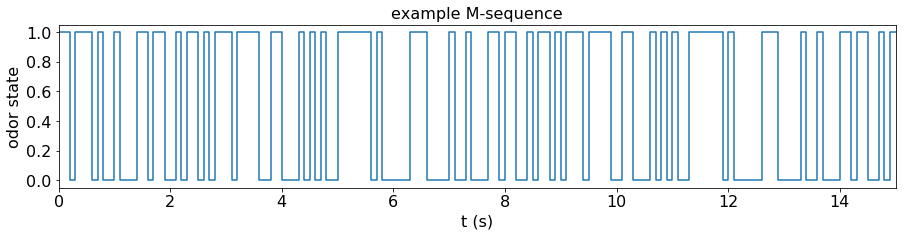

In [3]:
# plot sequence
DT = 0.1
t = np.array([np.arange(L)*DT, np.arange(1, L+1)*DT]).T.flatten()
s_ = np.array([s, s]).T.flatten()

fig, ax = plt.subplots(1, 1, figsize=(15, 3))

ax.plot(t, s_)
ax.set_xlim(0, 15)

ax.set_xlabel('t (s)')
ax.set_ylabel('odor state')
ax.set_title('example M-sequence')

set_font_size(ax, 16)